1. Write a Python program to simulate the following scenarios:
   a) Tossing a coin 10,000 times and calculating the experimental probability of heads and tails.
   b) Rolling two dice and and computing the probability of getting a sum of 7.

In [8]:
import random

Head = 0
Tail = 0
for i in range(1, 10001):
    outcome = random.randint(0,1)
    if outcome == 1:
        Head += 1
    else:
        Tail += 1
P_Head = Head/10000
P_Tail = Tail/10000
print("Probability of getting head = ", P_Head)
print("Probability of getting tail = ", P_Tail)

Probability of getting head =  0.5012
Probability of getting tail =  0.4988


In [13]:
import random

Times_rolled = input("Enter the number of times dice is rolled: ")
Times_rolled = int(Times_rolled)
count = 0

for i in range(Times_rolled):
    dice_1 = random.randint(1, 6)
    dice_2 = random.randint(1, 6)
    dice_sum = dice_1 + dice_2
    if dice_sum == 7:
        count += 1
P_sum_7 = count/Times_rolled
print("The probability of getting a of 7 = ", P_sum_7)

Enter the number of times dice is rolled: 2
The probability of getting a of 7 =  0.5


2. Write a function to estimate the probability of getting at least one "6" in 10 rolls of a fair die.

In [5]:
import random

count = 0
trials = int(input("Enter the number of times dice should be rolled '10' times"))

for i in range(trials):
    found_six = False
    for j in range(10):
        outcome =  random.randint(1,6)
        if outcome == 6:
            found_six = True
            break
    if found_six:
        count += 1
P_get_6 = count/trials
print("Estimated probability of getting at least one '6' in '10' roll of dice = ", P_get_6)

Enter the number of times dice should be rolled '10' times10000
Estimated probability of getting at least one '6' in '10' roll of dice =  0.8364


3. A bag contains 5 red, 7 green, and 8 blue balls. A ball is drawn randomly, its color noted, and it is put back into the bag. If this process is repeated 1000 times, write a Python program to estimate:  
  a. The probability of drawing a red ball given that the previous ball was blue.  
  b. Verify Bayes' theorem with the simulation results.

In [2]:
import random

red_ball = 5
green_ball = 7
blue_ball = 8
Total_balls = red_ball + green_ball + blue_ball
red = 0
green = 0
blue = 0

prev = None
count_prev_blue = 0
count_red_after_blue = 0
count_prev_blue_given_red = 0

for i in range(1000):
    draw = random.randint(1,  Total_balls)
    if draw <= red_ball:
        red += 1
        colour = "red"
    elif draw <= (red_ball + green_ball):
        green += 1
        colour = "green"
    else:
        blue += 1
        colour = "blue"
        
    if prev == "blue":
        count_prev_blue += 1
        if colour == "red":
            count_red_after_blue += 1
            
    if colour == "red" and prev == "blue":
        count_prev_blue_given_red += 1
            
    prev = colour
    
P_red = red / 1000
P_prev_blue = count_prev_blue / (1000 - 1)
P_prev_blue_given_red = count_prev_blue_given_red / red if red != 0 else 0
    
if count_prev_blue > 0:
    P_red_given_blue = count_red_after_blue/count_prev_blue
    print("Estimated P(Red | Previous was Blue):", round(P_red_given_blue, 4))
else:
    print("No previous blue draws to calculate conditional probability.")
    
if P_prev_blue != 0:
    P_red_given_prev_blue_bayes = (P_prev_blue_given_red * P_red) / P_prev_blue
    print("Bayes' Theorem P(Red | Previous was Blue):", round(P_red_given_prev_blue_bayes, 4))
else:
    print("Cannot apply Bayes' Theorem (division by zero).")
    
print("\n--- Summary ---")
print("Total Red Draws:", red)
print("Total Prev Blue Count:", count_prev_blue)
print("Total Red After Blue:", count_red_after_blue)
print("P(Red):", round(P_red, 4))
print("P(Prev Blue):", round(P_prev_blue, 4))
print("P(Prev Blue | Red):", round(P_prev_blue_given_red, 4))

Estimated P(Red | Previous was Blue): 0.2548
Bayes' Theorem P(Red | Previous was Blue): 0.2546

--- Summary ---
Total Red Draws: 261
Total Prev Blue Count: 416
Total Red After Blue: 106
P(Red): 0.261
P(Prev Blue): 0.4164
P(Prev Blue | Red): 0.4061


4. Generate a sample of size 1000 from a discrete random variable with the following distribution:  
  - P(X=1) = 0.25
  - P(X=2) = 0.35
  - P(X=3) = 0.4
  Compute the empirical mean, variance, and standard deviation of the sample.

In [1]:
import numpy as np

values = [1, 2, 3]
probabilities = [0.25, 0.35, 0.40]

sample = np.random.choice(values, size=1000, p=probabilities)

mean = np.mean(sample)
variance = np.var(sample)
std_dev = np.std(sample)

print(f"Empirical Mean: {mean:.4f}")
print(f"Empirical Variance: {variance:.4f}")
print(f"Empirical Standard Deviation: {std_dev:.4f}")

Empirical Mean: 2.1740
Empirical Variance: 0.6077
Empirical Standard Deviation: 0.7796


5. Simulate 2000 random samples from an exponential distribution with a mean of 5. Visualize the distribution using:  
  a. A histogram.  
  b. A probability density function (PDF) overlay.

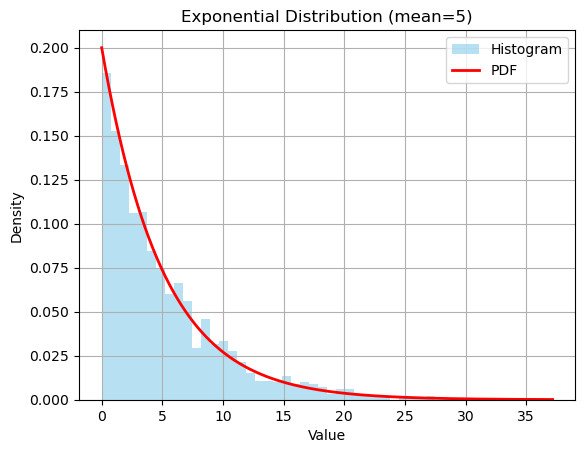

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

mean = 5
lambda_val = 1 / mean

samples = np.random.exponential(scale=mean, size=2000)

plt.hist(samples, bins=50, density=True, alpha=0.6, color='skyblue', label='Histogram')

x = np.linspace(0, np.max(samples), 1000)
pdf = lambda_val * np.exp(-lambda_val * x)
plt.plot(x, pdf, 'r-', label='PDF', linewidth=2)

plt.title('Exponential Distribution (mean=5)')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

6. Simulate the Central Limit Theorem by following these steps  
  a. Generate 10,000 random numbers from a uniform distribution.  
  b. Draw 1000 samples of size n = 30.  
  c. Calculate and visualize the distribution of sample means.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

population = np.random.uniform(0, 1, 10000)

sample_size = 30
num_samples = 1000
sample_means = []

for _ in range(num_samples):
    sample = np.random.choice(population, size=sample_size, replace=False)
    sample_means.append(np.mean(sample))

plt.hist(sample_means, bins=40, density=True, color='lightgreen', edgecolor='black', alpha=0.7)
plt.title('Central Limit Theorem Simulation')
plt.xlabel('Sample Mean')
plt.ylabel('Density')
plt.grid(True)
plt.show()